### Predictions
This notebook contains prediction done on new image to see how the models perform.

The models are read from a saved file that was saved when the model was run on AWS.

The notebook also contains the prediction of CNN model on test images.

In [5]:
from keras.models import load_model, model_from_json
from matplotlib import pyplot
import PIL
from PIL import Image
import numpy as np
from DataPreparation import load, load2d

In [3]:
img = Image.open('data/test_image.jpeg', 'r')

## Convert the image to grayscale
#img.convert('L')
#img.save('data/gray_test_image.jpg')

## Resize the image
img = img.resize((96, 96), PIL.Image.ANTIALIAS)

## save the image
img.save('data/resized_test_image.jpeg')

## Convert the image to numpy array
arr = np.array(img)

## convert the image to 2d
gray_arr = arr[:,:,0]

## Flatten the array
gray_arr_flatten = gray_arr.flatten().reshape(1,9216)

In [4]:
def load_myImage(image_arr, cols = None):
    X = image_arr / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)
    y = None

    return X,y

Loaded model from disk


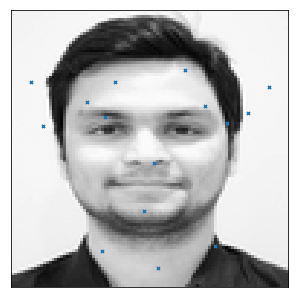

In [13]:
########## Predicting My Image from Model 1 v1
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)
    #axis.plot(y[0::2] * 48 + 48, y[1::2] * 48 + 48, 'bo-') # connecting the points

X, _ = load_myImage(gray_arr_flatten)

# load json and create model
json_file = open('final_model/'+'model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('final_model/'+"model11.h5")
print("Loaded model from disk")

y_pred = loaded_model.predict(X)

fig = pyplot.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(1):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

Loaded model from disk


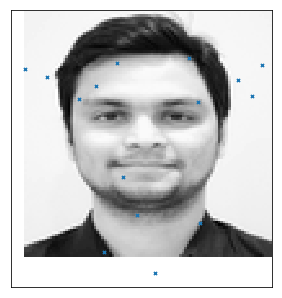

In [15]:
########## Predicting My Image from Model 2 v2
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)
    #axis.plot(y[0::2] * 48 + 48, y[1::2] * 48 + 48, 'bo-') # connecting the points

X, _ = load_myImage(gray_arr_flatten)

# load json and create model
json_file = open('final_model/'+'model1_v2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('final_model/'+"model1_v2.h5")
print("Loaded model from disk")

y_pred = loaded_model.predict(X)

fig = pyplot.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(1):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

Loaded model from disk


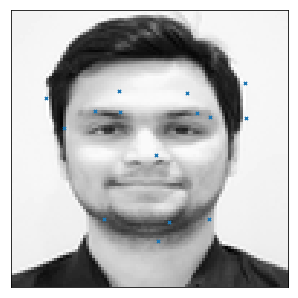

In [17]:
########## Predicting My Image from Model 3 CNN
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)
    #axis.plot(y[0::2] * 48 + 48, y[1::2] * 48 + 48, 'bo-') # connecting the points

X, _ = load_myImage(gray_arr_flatten)
X = X.reshape(X.shape[0], 96, 96, 1)
# load json and create model
json_file = open('final_model/'+'model3_cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('final_model/'+"model3_cnn.h5")
print("Loaded model from disk")

y_pred = loaded_model.predict(X)

fig = pyplot.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(1):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

Loaded model from disk


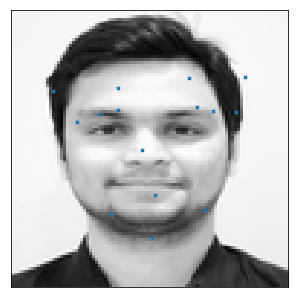

In [19]:
########## Predicting My Image from Model 3 CNN - Flip
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)
    #axis.plot(y[0::2] * 48 + 48, y[1::2] * 48 + 48, 'bo-') # connecting the points

X, _ = load_myImage(gray_arr_flatten)
X = X.reshape(X.shape[0], 96, 96, 1)
# load json and create model
json_file = open('final_model/'+'model3_cnn_flip.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('final_model/'+"model3_cnn_flip.h5")
print("Loaded model from disk")

y_pred = loaded_model.predict(X)

fig = pyplot.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(1):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

ImageId    1783
Image      1783
dtype: int64
Loaded model from disk


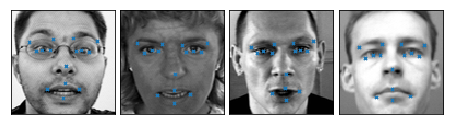

In [7]:
########## Prediction on test images for Model3 CNN ############

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load2d(test=True)
#X, _ = load_myImage(gray_arr_flatten)
X = X.reshape(X.shape[0], 96, 96, 1)
# load json and create model
json_file = open('final_model/'+'model3_cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('final_model/'+"model3_cnn.h5")
print("Loaded model from disk")

y_pred = loaded_model.predict(X)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()